# Modern Architectures(معماری های مدرن)

### 1.Transformers(BERT,GPT,T5,ViT)
EN: Using Attention, it sees the entire input at once (unlike RNN which reads it piece by piece)
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
FA: با استفاده از Attention ،کل ورودی رو یکجا می خواند(بر خلاف RNNکه دونه دونه می خواند )

BERT : فهم متن(تحلیلاحساست ، پرسش و پاسخ)

GPT : تولید متن(چت بات)

T5 : ترجمه و خلاص سازی

ViT : دسته بندی تصاویر با Transformer
</div>

In [7]:
import torch 
import torch.nn as nn

model = nn.Transformer(
    d_model = 128,          # ابعاد ویژگی
    nhead = 8,              #تعداد هد های Attention
    num_encoder_layers = 2, #2 layers encoder
    num_decoder_layers = 2  #2 layers decoder
)

src = torch.rand((10, 32, 128))      # ==> جمله ای به طول 10 ، batch = 32
tgt = torch.rand((20, 32, 128))
out = model(src, tgt)       # قرار دادن ورودی به مدل

print(out.shape)



torch.Size([20, 32, 128])


### 2.Vision Transformers (ViT)
EN:It divides the image into smaller pieces called patches and gives them to the model like a sentence.
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
FA :تصویر را به تکه های کوچک تر به نام (patches) تقسیم میکند و مثل جمله به مدل میدهد .
در دسته بندی عکس ها کار برد دارد
</div>

In [10]:
from torchvision.models import vit_b_16
import torch

model = vit_b_16(pretrained=True) #==>Vision Transformer Base
x = torch.randn(1, 3, 224, 224) #(۳ کانال RGB، اندازه 224×224)

out = model(x)
print(out.shape)

torch.Size([1, 1000])


### 3.Hybrid Models(CNN + Transformer)
EN :CNN captures the detailed features of the image and Transformer captures the general features.
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
 CNN ویژگی های جزیی تصویر رو میگیرد و Transformer ویژگی های کلی رو.
با مدل هایی مانند ViT + ConvNext در ساخت تصویر و ویدیو
</div>

In [11]:
import torch.nn as nn

class HybridModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Conv2d(3, 64, kernel_size=3, stride=2)
        self.transform = nn.Transformer(d_model=64,nhead=4,num_encoder_layers=2)

    def forward(self, x):
        x = self.cnn(x)
        x = x.flatten(2).permute(2,0,1)
        x = self.transform(x, x)
        return x

model = HybridModel()
out = model(torch.randn(1, 3,64 , 64))
print(out.shape)




torch.Size([961, 1, 64])


# Advanced Topics(حوزه های پیشرفته)

## Computer Vision(بینایی ماشین)
### 1.Object Detection (YOLO,Faster R-CNN, DETR)
EN :Find and draw a box around objects in an image
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
پیدا کردن و کشیدن جعبه به دور اشیا در تصویر ريال در تشخیص ماشین در جاده برای خودرو های خودران  کاربرد دارد</div>

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


image 1/1 C:\Users\Pars\Desktop\my computer\program\Deep learning\study code\bus.jpg: 640x480 4 persons, 1 bus, 245.2ms
Speed: 3.4ms preprocess, 245.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


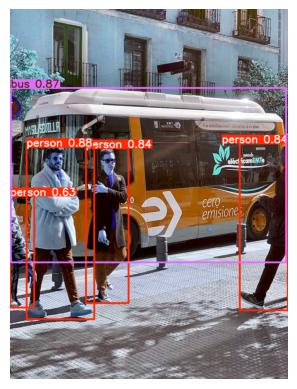

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
model = YOLO("yolov5s.pt")
results = model("bus.jpg")

plt.imshow(results[0].plot())
plt.axis("off")
plt.show()


### 2.Image Segmentation(Mask R-CNN, UNet++,DeepLab)
EN:It classifies each pixel (not each frame)
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
هر پیکسل رو دسته بندی میکنه( نه هر کادر رو) و در تشخیص تصاویر تومر در پزشکی کاربرد دارد</div>

Masks shape: torch.Size([3, 1, 1213, 1546])


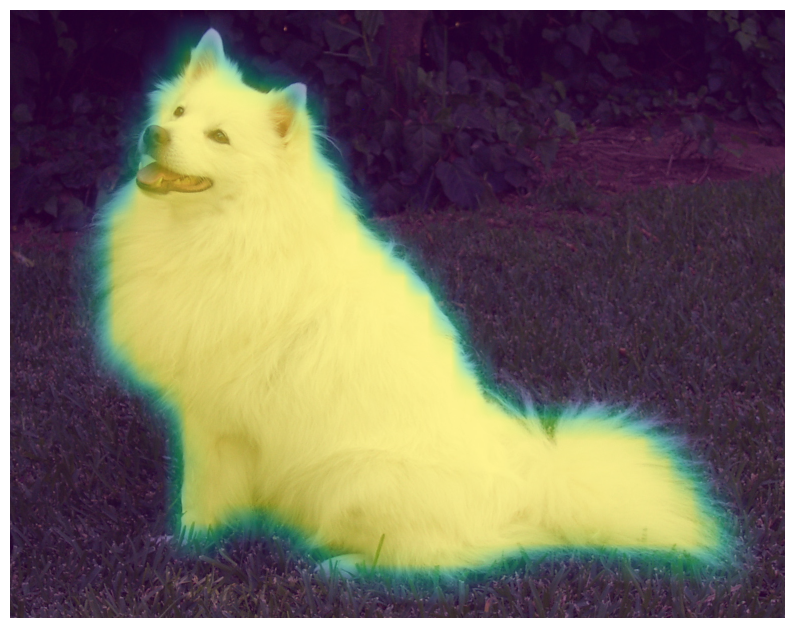

In [20]:
import torchvision
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt


model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# بارگذاری تصویر
img = Image.open("dog.jpg").convert("RGB")

# تبدیل به تنسور
transform = T.ToTensor()
x = transform(img).unsqueeze(0)

# پیش‌بینی
out = model(x)

# خروجی ماسک‌ها
masks = out[0]["masks"]        # [num_objects, 1, H, W]
scores = out[0]["scores"]      # اعتماد مدل برای هر شیء
labels = out[0]["labels"]      # کلاس‌ها (COCO: 1=person, 18=dog, ...)

print("Masks shape:", masks.shape)

# فقط ماسک‌هایی که اعتماد بالای 0.8 دارند را نگه داریم
threshold = 0.8
keep = scores > threshold

# نمایش تصویر اصلی
plt.figure(figsize=(10, 10))
plt.imshow(img)

# روی تصویر ماسک‌ها را اضافه کنیم
for i, m in enumerate(masks[keep]):
    mask = m[0].detach().cpu().numpy()
    plt.imshow(mask, alpha=0.5)

plt.axis("off")
plt.show()


### 3.Generative Models(GANs)
EN:Two networks compete with each other, one creates a fake photo and the other determines whether it is real or fake. It is used in the production of artificial faces, clothing design, and digital art.
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
دوشبکه با هم رقابت می کنند یکی عکس تقلبی میسازد و اون یکی تشخیص میدهد واقعی است یا تقلبی در تولید چهره مصنوعی، طراحی لباس و هنر دیجیتال کاربرد  دارد</div>

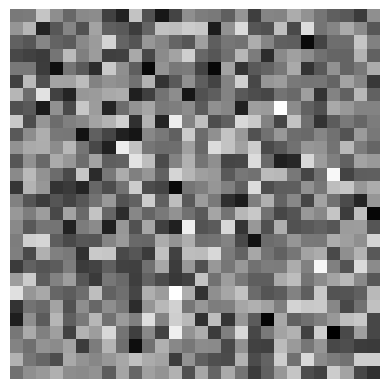

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.fc(z).view(-1, 1, 28, 28)

G = Generator()

z = torch.randn(1, 100)

fake_img = G(z).detach().squeeze().numpy()

plt.imshow(fake_img, cmap="gray")
plt.axis("off")
plt.show()



### 4.Diffusion Models(Stable Diffusion, DALL.E)
EN :It fills the image with noise and then removes it to produce a new image.
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
تصویر را سرشار از نویز میکند تا با برداشتن آن ها تصویر جدیدی تولید کند.;کاربرد آن در ساخت تصاویر از متن میباشد</div>

epoch 0 | step 50 | loss 0.3380
epoch 0 | step 100 | loss 0.2946
epoch 0 | step 150 | loss 0.2260
Done ./ddpm_mnist_out\samples_grid.png


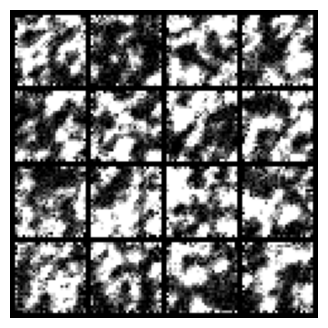

In [38]:
import math, os, sys
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, utils as vutils
import matplotlib.pyplot as plt

# ---------------------------
# 0) تنظیمات پایه
# ---------------------------
device = torch.device("cpu")     # اجرای CPU
image_size = 28
batch_size = 64
learning_rate = 2e-4
timesteps = 200                  # تعداد گام‌های دیفیوشن (کم نگه می‌داریم)
EPOCHS = 1
LIMIT_STEPS = 400               # برای سرعت روی CPU، آموزش را محدود می‌کنیم
save_dir = "./ddpm_mnist_out"
os.makedirs(save_dir, exist_ok=True)
torch.manual_seed(42)

# ---------------------------
# 1) دیتاست MNIST با نرمال‌سازی به [-1, 1]
# ---------------------------
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),               # [0,1]
    transforms.Lambda(lambda x: x*2 - 1) # [-1,1]
])

try:
    train_ds = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
except Exception as e:
    print("❌ دانلود MNIST ناموفق بود. خطا:", e)
    print("لطفاً دیتاست را دستی اضافه کنید یا اتصال را بررسی کنید.")
    raise

# برای سرعت، یک زیرمجموعه کوچک‌تر می‌گیریم (مثلاً 10k نمونه)
subset_indices = list(range(min(10000, len(train_ds))))
train_loader = DataLoader(Subset(train_ds, subset_indices), batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)

# ---------------------------
# 2) زمان‌嵌ده‌ی سینوسی (Sinusoidal time embedding)
# ---------------------------
class SinusoidalPosEmb(nn.Module):
    def __init__(self, dim=16):
        super().__init__()
        self.dim = dim
    def forward(self, t):
        # t: (B,) اعداد صحیح 0..T-1
        device = t.device
        half = self.dim // 2
        freqs = torch.exp(-math.log(1e4) * torch.arange(0, half, device=device).float() / half)
        # (B, half)
        args = t.float().unsqueeze(1) * freqs.unsqueeze(0)
        emb = torch.cat([torch.sin(args), torch.cos(args)], dim=-1)  # (B, dim)
        return emb

# ---------------------------
# 3) UNet خیلی کوچک (برای 28×28 تک‌کاناله)
# ---------------------------
class TinyUNet(nn.Module):
    def __init__(self, time_dim=64, base_ch=64):
        super().__init__()
        self.time_mlp = nn.Sequential(
            SinusoidalPosEmb(16),
            nn.Linear(16, time_dim),
            nn.SiLU(),
            nn.Linear(time_dim, time_dim),
        )
        # Encoder
        self.conv_in = nn.Conv2d(1, base_ch, 3, padding=1)
        self.conv_down = nn.Conv2d(base_ch, base_ch, 4, stride=2, padding=1)  # 28 -> 14
        self.conv_mid = nn.Conv2d(base_ch, base_ch, 3, padding=1)

        # Decoder
        self.deconv_up = nn.ConvTranspose2d(base_ch, base_ch, 4, stride=2, padding=1)  # 14 -> 28
        self.conv_out1 = nn.Conv2d(base_ch, base_ch//2, 3, padding=1)
        self.conv_out2 = nn.Conv2d(base_ch//2, 1, 3, padding=1)

    def forward(self, x, t):
        # t: (B,) -> (B, time_dim)
        temb = self.time_mlp(t).unsqueeze(-1).unsqueeze(-1)  # (B, time_dim, 1, 1)

        # Encoder
        h1 = F.silu(self.conv_in(x))         # (B, C, 28, 28)
        h2 = F.silu(self.conv_down(h1))      # (B, C, 14, 14)
        h2 = h2 + temb[:, :h2.size(1)]       # تزریق زمان

        # Bottleneck
        h3 = F.silu(self.conv_mid(h2))

        # Decoder
        h4 = F.silu(self.deconv_up(h3))      # (B, C, 28, 28)
        h4 = h4 + h1                          # اتصال میان‌بر ساده (skip)
        h5 = F.silu(self.conv_out1(h4))
        out = self.conv_out2(h5)              # پیش‌بینی نویز eps با همان ابعاد x
        return out

# ---------------------------
# 4) زمان‌بندی بتا/آلفا (DDPM)
# ---------------------------
def make_beta_schedule(T, start=1e-4, end=2e-2):
    return torch.linspace(start, end, T)

betas = make_beta_schedule(timesteps).to(device)                 # (T,)
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)                    # \bar{alpha}_t
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1,0), value=1.0)

sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
posterior_variance = betas * (1.0 - alphas_cumprod_prev) / (1.0 - alphas_cumprod)

# ---------------------------
# 5) توابع کمکی
# ---------------------------
def get_timesteps(batch):
    return torch.randint(0, timesteps, (batch,), device=device).long()

def q_sample(x0, t, noise=None):
    """ x_t = sqrt(alpha_bar_t)*x0 + sqrt(1-alpha_bar_t)*noise """
    if noise is None:
        noise = torch.randn_like(x0)
    sqrt_ab = sqrt_alphas_cumprod[t].view(-1,1,1,1)
    sqrt_omab = sqrt_one_minus_alphas_cumprod[t].view(-1,1,1,1)
    return sqrt_ab * x0 + sqrt_omab * noise

@torch.no_grad()
def p_sample(model, x, t):
    """ یک گام رو به عقب از x_t -> x_{t-1} با پیش‌بینی eps """
    b = x.size(0)
    t_tensor = torch.full((b,), t, device=device, dtype=torch.long)
    eps_theta = model(x, t_tensor)
    # معادله DDPM:
    # x0_pred = (x_t - sqrt(1-ab_t)*eps) / sqrt(ab_t)  (نیاز نیست مستقیم)
    coef1 = 1 / torch.sqrt(alphas[t])
    coef2 = betas[t] / torch.sqrt(1 - alphas_cumprod[t])
    x_mean = coef1 * (x - coef2 * eps_theta)
    if t == 0:
        return x_mean
    var = posterior_variance[t]
    noise = torch.randn_like(x)
    return x_mean + torch.sqrt(var) * noise

@torch.no_grad()
def sample(model, n=16):
    model.eval()
    x = torch.randn(n, 1, image_size, image_size, device=device)
    for t in reversed(range(timesteps)):
        x = p_sample(model, x, t)
    x = (x.clamp(-1,1) + 1) / 2.0  # به [0,1]
    return x

# ---------------------------
# 6) مدل و آموزش
# ---------------------------
model = TinyUNet().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

global_step = 0
model.train()
for epoch in range(EPOCHS):
    for imgs, _ in train_loader:
        imgs = imgs.to(device)  # (B,1,28,28) در [-1,1]
        t = get_timesteps(imgs.size(0))
        noise = torch.randn_like(imgs)
        x_t = q_sample(imgs, t, noise)
        # مدل سعی می‌کند نویز را حدس بزند
        eps_theta = model(x_t, t)
        loss = F.mse_loss(eps_theta, noise)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        global_step += 1
        if global_step % 50 == 0:
            print(f"epoch {epoch} | step {global_step} | loss {loss.item():.4f}")

        if global_step >= LIMIT_STEPS:
            break
    if global_step >= LIMIT_STEPS:
        break

# ---------------------------
# 7) نمونه‌گیری و ذخیره خروجی
# ---------------------------
with torch.no_grad():
    samples = sample(model, n=16).cpu()  # (16,1,28,28)

# گرید 4×4 بساز و ذخیره کن
grid_path = os.path.join(save_dir, "samples_grid.png")
vutils.save_image(samples, grid_path, nrow=4)
print(f"Done {grid_path}")

# نمایش
plt.figure(figsize=(4,4))
plt.axis("off")
plt.imshow(vutils.make_grid(samples, nrow=4).permute(1,2,0).cpu().numpy())
plt.show()

## NLP (پردازش زبان طبیعی)
### 1. Large Language Models(LLMs) =>(GPT-4,LLaMA)
EN:Models that can understand and produce natural language with billions of parameters. They are used in chatbots, text generation, and automated coding.
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
مدل هایی که با میلیارد ها پارامتر میتوانند زبان طبیعی را بفهمند و تولید کنند.در چت بات ها ، تولید متن، کدنویسی خودکار کاربرد دارند

In [40]:
import torch, torch.nn as nn
torch.manual_seed(0)

# ---------- 1) tiny corpus ----------
corpus = (
    "Once upon a time there was a small cat on the moon. "
    "The cat dreamed of being an astronaut, chasing stars at night. "
    "It built a cardboard rocket and took off!"
)
# می‌تونی این رو فارسی کنی؛ مثلا:
# corpus = "سلام دنیا سلام دنیا این یک تست ساده برای تولید متن با شبکه عصبی است "

chars = sorted(list(set(corpus)))
stoi  = {c:i for i,c in enumerate(chars)}
itos  = {i:c for c,i in stoi.items()}
vocab_size = len(chars)

def encode(s): return torch.tensor([stoi[c] for c in s], dtype=torch.long)
def decode(t): return "".join(itos[i] for i in t.tolist())

data = encode(corpus)

# ---------- 2) dataset as sliding windows ----------
block_size = 64   # طول توالی ورودی
def get_batch(batch_size=32):
    ix = torch.randint(0, len(data)-block_size-1, (batch_size,))
    X = torch.stack([data[i:i+block_size] for i in ix])
    Y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return X, Y  # [B, T]

# ---------- 3) tiny GRU language model ----------
class CharGRU(nn.Module):
    def __init__(self, vocab, emb=64, hid=128):
        super().__init__()
        self.emb = nn.Embedding(vocab, emb)
        self.gru = nn.GRU(emb, hid, batch_first=True)
        self.fc  = nn.Linear(hid, vocab)

    def forward(self, x, h=None):
        x = self.emb(x)
        y, h = self.gru(x, h)
        logits = self.fc(y)
        return logits, h

model = CharGRU(vocab_size)
opt = torch.optim.AdamW(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

# ---------- 4) quick training (tiny) ----------
model.train()
steps = 600
for step in range(steps):
    X, Y = get_batch(32)
    logits, _ = model(X)
    loss = loss_fn(logits.reshape(-1, vocab_size), Y.reshape(-1))
    opt.zero_grad(); loss.backward(); opt.step()
    if step % 100 == 0:
        print(f"step {step}: loss {loss.item():.3f}")

# ---------- 5) sampling ----------
@torch.no_grad()
def generate(model, start="Once ", max_new_tokens=200, temperature=0.8):
    model.eval()
    x = encode(start)
    x = x.unsqueeze(0)
    h = None
    out = x.clone()
    for _ in range(max_new_tokens):
        logits, h = model(out[:, -block_size:], h)
        last_logits = logits[:, -1, :] / temperature
        probs = last_logits.softmax(dim=-1)
        next_id = torch.multinomial(probs, num_samples=1)  # [1,1]
        out = torch.cat([out, next_id], dim=1)
    return decode(out[0])

print("\n=== Generated text ===")
print(generate(model, start="Once ", max_new_tokens=200, temperature=0.8))

step 0: loss 3.342
step 100: loss 0.052
step 200: loss 0.035
step 300: loss 0.036
step 400: loss 0.035
step 500: loss 0.028

=== Generated text ===
Once upon a time there was a small cat on the moon. The cat dreamed of being an astronaut, chasing stars at night. It built a cardboard rocket and took offf being an astronaut, chasing stars at night. It b


### 2.Instruction Tuning & PLHF
EN :Teaching the model to better follow user commands (with command/response data + human feedback)
<div dir="rtl" style="text-align: right; font-family: Tahoma, Arial, sans-serif;">
یاد دادن به مدل برای اینکه دستور کاربر رو بهتر دنبال کنه(با داده های دستور /پاسخ+ بازخورد انسانی)

کاربرد => ChatGPT،Claude،Gemini
</div>

In [43]:
# Minimal Instruction Tuning (char-level, PyTorch-only, CPU) with <UNK>
import torch, torch.nn as nn
torch.manual_seed(0)

# 1) دستور-پاسخ‌های نمونه (می‌توانید بیشتر کنید)
pairs = [
    ("Translate 'hello' to Persian", "سلام"),
    ("Add 2 and 3", "5"),
    ("What is the capital of France?", "Paris"),
    ("Reverse the word 'cat'", "tac"),
]

TEMPLATE = "### Instruction:\n{ins}\n### Response:\n{out}\n\n"
corpus = "".join(TEMPLATE.format(ins=i, out=o) for i, o in pairs)

# 2) واژگان کاراکتری + توکن ناشناخته
special = ["<UNK>"]
chars = sorted(set(corpus)) + special
stoi  = {c:i for i,c in enumerate(chars)}
itos  = {i:c for c,i in stoi.items()}

def enc(s):
    unk = stoi["<UNK>"]
    return torch.tensor([stoi.get(c, unk) for c in s], dtype=torch.long)

def dec(t):
    return "".join(ch for ch in (itos[int(i)] for i in t) if ch != "<UNK>")

data = enc(corpus)

# 3) دیتاست next-token ساده
block = 128
def get_batch(bs=32):
    ix = torch.randint(0, len(data)-block-1, (bs,))
    X = torch.stack([data[i:i+block] for i in ix])
    Y = torch.stack([data[i+1:i+block+1] for i in ix])
    return X, Y  # [B,T]

# 4) مدل کوچک: Embedding + GRU + Linear
class TinyLM(nn.Module):
    def __init__(self, V, emb=64, hid=128):
        super().__init__()
        self.emb = nn.Embedding(V, emb)
        self.gru = nn.GRU(emb, hid, batch_first=True)
        self.fc  = nn.Linear(hid, V)
    def forward(self, x, h=None):
        x = self.emb(x)              # [B,T,emb]
        y, h = self.gru(x, h)        # [B,T,hid]
        return self.fc(y), h         # [B,T,V], h

V = len(chars)
model = TinyLM(V)
opt = torch.optim.AdamW(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

# 5) آموزش کوتاه برای اجرا روی CPU
model.train()
for step in range(600):
    X, Y = get_batch(32)
    logits, _ = model(X)
    loss = loss_fn(logits.reshape(-1, V), Y.reshape(-1))
    opt.zero_grad(); loss.backward(); opt.step()
    if step % 100 == 0:
        print(f"step {step} | loss {loss.item():.3f}")

# 6) تولید پاسخ برای یک دستور
@torch.no_grad()
def generate_response(instruction, max_new=120, temperature=0.8):
    model.eval()
    prompt = TEMPLATE.format(ins=instruction, out="")   # تا شروع Response
    x = enc(prompt).unsqueeze(0)                        # [1,T]
    h = None
    out = x.clone()
    for _ in range(max_new):
        logits, h = model(out[:, -block:], h)          # آخرین پنجره
        probs = (logits[:, -1, :] / temperature).softmax(dim=-1)
        nxt = torch.multinomial(probs, 1)              # [1,1]
        out = torch.cat([out, nxt], dim=1)
    text = dec(out[0])
    # جدا کردن بخش پاسخ بین "### Response:" و فاصلهٔ خالی بعدی
    return text.split("### Response:\n",1)[1].split("\n\n",1)[0].strip()

# 7) تست
print("\n--- Answer:", generate_response("Translate 'hello' to Persian"))
print("--- Answer:", generate_response("Add 7 and 8"))            # دیگر KeyError نمی‌دهد
print("--- Answer:", generate_response("Reverse the word 'dog'"))

step 0 | loss 3.634
step 100 | loss 0.063
step 200 | loss 0.050
step 300 | loss 0.037
step 400 | loss 0.016
step 500 | loss 0.015

--- Answer: 
--- Answer: 
--- Answer: 
